In [1]:
# Import packages

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import file

raw_listings = pd.read_csv('Paris/listings.csv')
print(f"The dataset contains {len(raw_listings)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_listings.columns)) 
pd.set_option('display.max_rows', None)
raw_listings.head()

The dataset contains 67942 Airbnb listings


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,52931,https://www.airbnb.com/rooms/52931,20230904181324,2023-09-06,previous scrape,Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...,I will be delighted to welcome you to my charm...,"In some streets, Les Épinettes has also become...",https://a0.muscache.com/pictures/miso/Hosting-...,50502817,https://www.airbnb.com/users/show/50502817,Pierre De WeHost,2015-12-04,"Paris, France","Bonjour, \nExperts Airbnb depuis 10 ans, nous ...",within an hour,96%,97%,f,https://a0.muscache.com/im/pictures/user/f1221...,https://a0.muscache.com/im/pictures/user/f1221...,Batignolles,519.0,643.0,"['email', 'phone']",t,t,"Paris, Île-de-France, France",Batignolles-Monceau,NaN,48.89613,2.32746,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""Microwave"", ""Hot water kettle"", ""Cleaning pr...",$209.00,3,730,3,3,730,730,3.0,730.0,NaN,t,20,20,20,20,2023-09-06,17,17,0,2022-11-01,2023-06-25,4.65,4.65,4.47,4.59,4.71,4.24,4.24,7511706944917,t,382,378,4,0,1.65
1,53353,https://www.airbnb.com/rooms/53353,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...,A 100 m2 Loft/apartment (with 20 m2 terrace) o...,NEIGHBORHOOD: Montmartre-Clichy-Pigalles-Les F...,https://a0.muscache.com/pictures/2a1726b5-5a09...,37051412,https://www.airbnb.com/users/show/37051412,Indranil,2015-06-29,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/f77f4...,https://a0.muscache.com/im/pictures/user/f77f4...,NaN,1.0,14.0,['email'],t,t,"Paris, Île-de-France, France",Buttes-Montmartre,NaN,48.88985,2.35066,Entire rental unit,Entire home/apt,6,NaN,2.5 baths,2.0,3.0,"[""Children\u2019s books and toys for ages 2-5 ...",$297.00,2,120,2,2,1125,1125,2.0,1125.0,NaN,t,23,53,83,358,2023-09-05,37,5,1,2010-10-05,2023-08-09,4.82,4.85,4.85,4.97,4.91,4.48,4.73,7511800114704,f,1,1,0,0,0.24
2,3109,https://www.airbnb.com/rooms/3109,20230904181324,2023-09-05,city scrape,Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, France",NaN,within a day,100%,100%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,2.0,"['email', 'phone']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83191,2.31870,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Hangers"", ""Washer"", ""Paid parking off premis...",$110.00,2,30,2,2,30,30,2.0,30.0,NaN,t,9,24,33,253,2023-09-05,9,0,0,2016-12-27,2019-10-24,5.00,5.00,5.00,5.00,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.11
3,54377,https:

In [3]:
raw_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67942 entries, 0 to 67941
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67942 non-null  int64  
 1   listing_url                                   67942 non-null  object 
 2   scrape_id                                     67942 non-null  int64  
 3   last_scraped                                  67942 non-null  object 
 4   source                                        67942 non-null  object 
 5   name                                          67942 non-null  object 
 6   description                                   67416 non-null  object 
 7   neighborhood_overview                         38031 non-null  object 
 8   picture_url                                   67942 non-null  object 
 9   host_id                                       67942 non-null 

## Droppping unnecessary collumns

In [4]:
cols_to_drop = ['source','listing_url', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed','scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
listings = raw_listings.drop(cols_to_drop, axis=1)

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67942 entries, 0 to 67941
Data columns (total 54 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67942 non-null  int64  
 1   host_since                                    67935 non-null  object 
 2   host_response_time                            42044 non-null  object 
 3   host_response_rate                            42044 non-null  object 
 4   host_acceptance_rate                          45676 non-null  object 
 5   host_is_superhost                             66968 non-null  object 
 6   host_listings_count                           67935 non-null  float64
 7   host_total_listings_count                     67935 non-null  float64
 8   neighbourhood                                 38031 non-null  object 
 9   neighbourhood_cleansed                        67942 non-null 

In [6]:
# Drop collumns with NaN

In [7]:
listings.isna().sum()

id                                                  0
host_since                                          7
host_response_time                              25898
host_response_rate                              25898
host_acceptance_rate                            22266
host_is_superhost                                 974
host_listings_count                                 7
host_total_listings_count                           7
neighbourhood                                   29911
neighbourhood_cleansed                              0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                                       67942
bathrooms_text                                     83
bedrooms                                        15620
beds                        

In [8]:
listings.drop(['host_acceptance_rate','instant_bookable','neighbourhood','host_total_listings_count','bedrooms',  'bathrooms', 'calendar_updated','license'], axis=1, inplace=True)

listings.set_index('id', inplace=True) # The id will be used as the index

In [9]:
listings.isna().sum()

host_since                                          7
host_response_time                              25898
host_response_rate                              25898
host_is_superhost                                 974
host_listings_count                                 7
neighbourhood_cleansed                              0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms_text                                     83
beds                                              700
amenities                                           0
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights      

In [10]:
listings.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)


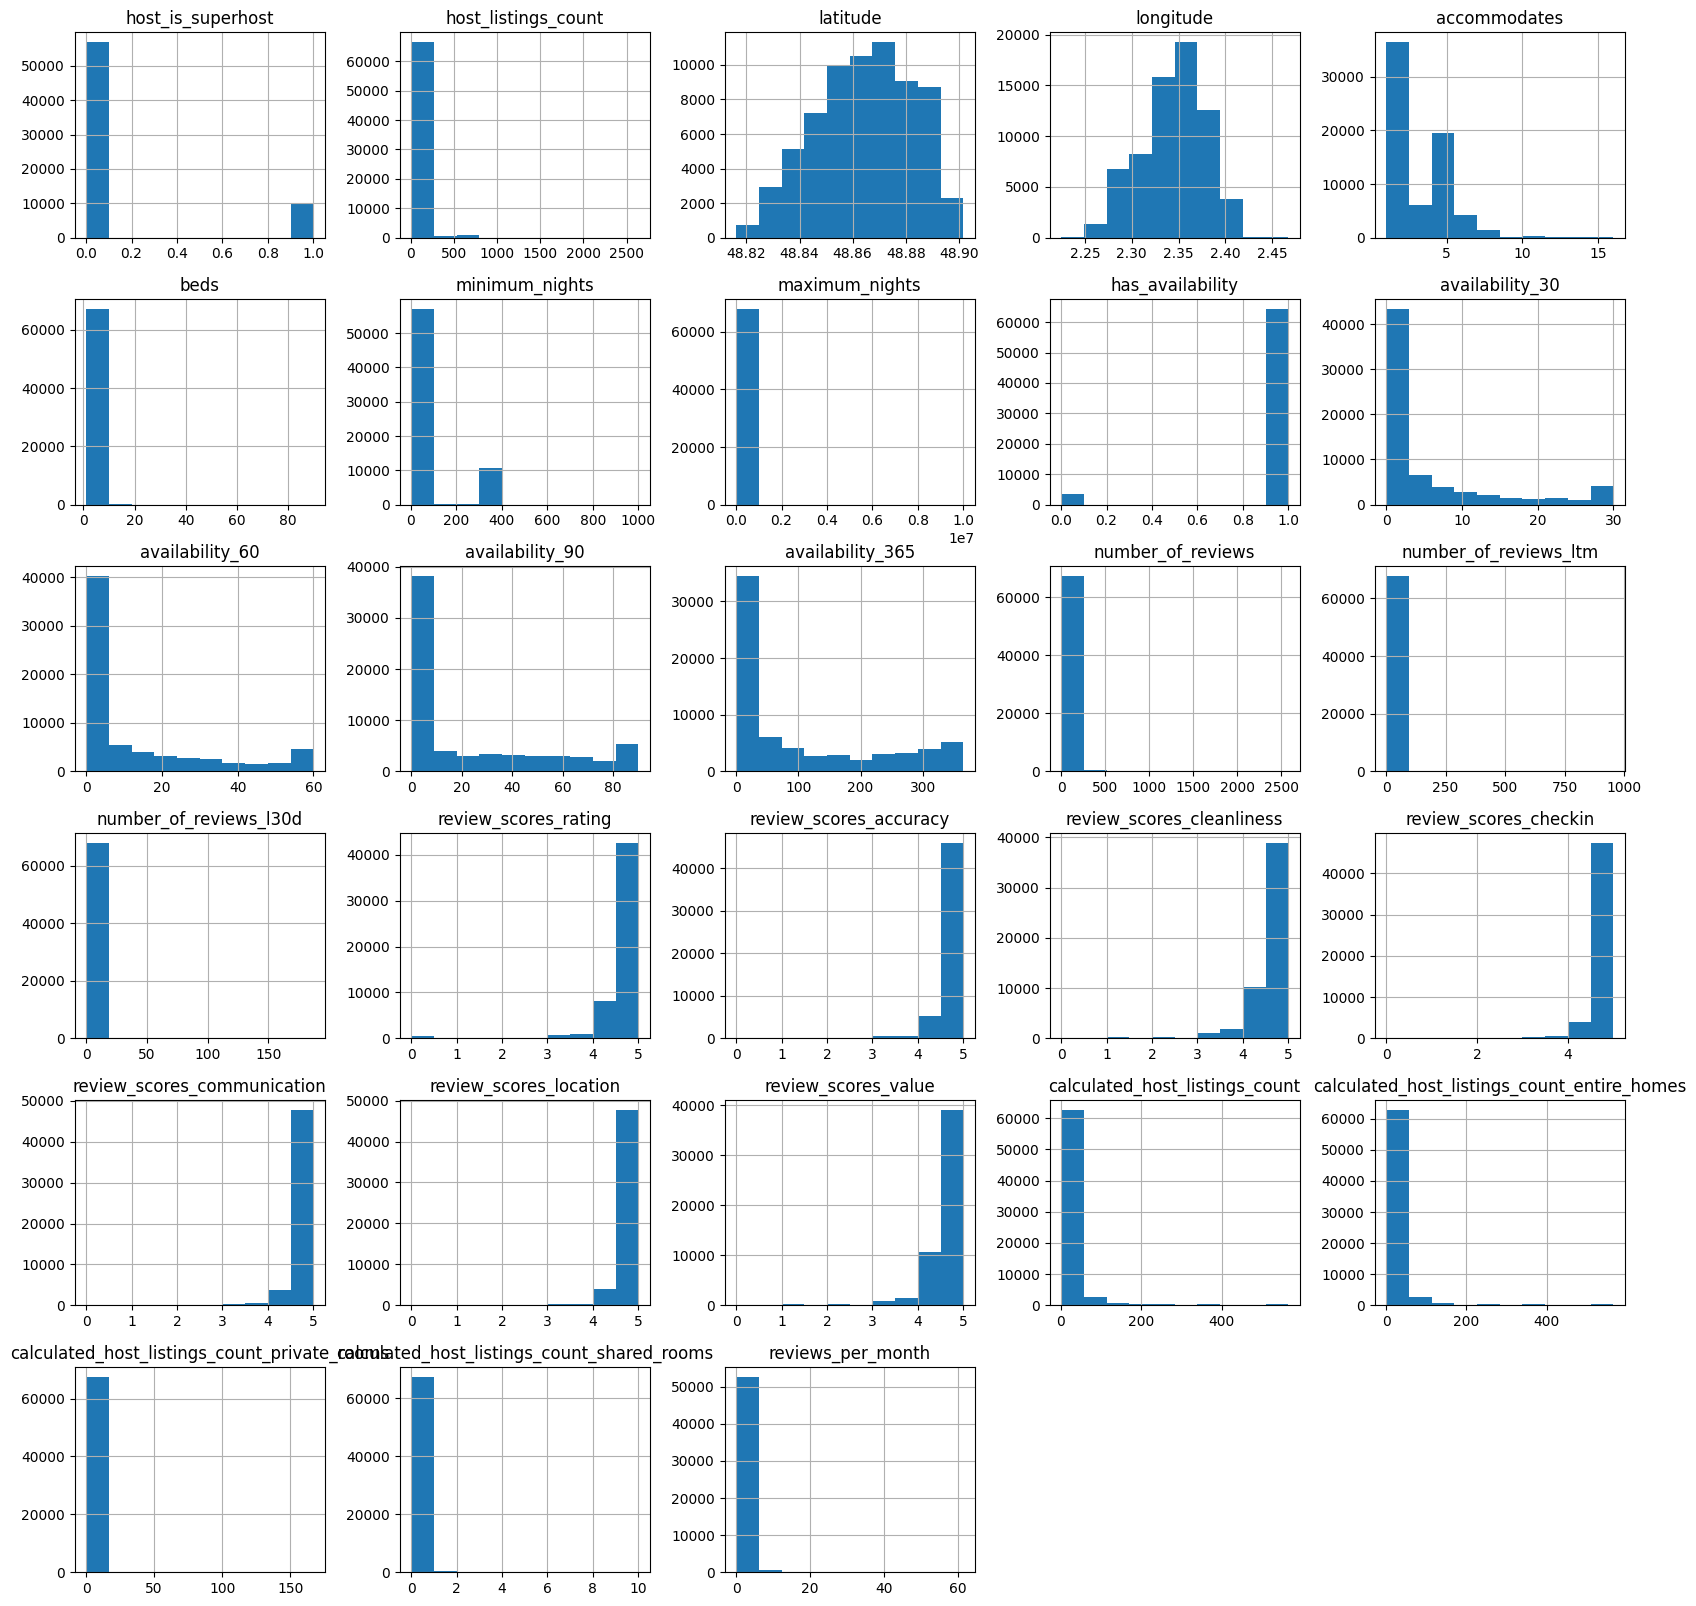

In [11]:
# Replacing columns with f/t with 0/1
listings.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
listings.hist(figsize=(20,20));

In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67942 entries, 52931 to 972916211667468705
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_since                                    67935 non-null  object 
 1   host_response_time                            42044 non-null  object 
 2   host_response_rate                            42044 non-null  object 
 3   host_is_superhost                             66968 non-null  float64
 4   host_listings_count                           67935 non-null  float64
 5   neighbourhood_cleansed                        67942 non-null  object 
 6   latitude                                      67942 non-null  float64
 7   longitude                                     67942 non-null  float64
 8   property_type                                 67942 non-null  object 
 9   room_type                                     679

## Cleaning Individual Columns

### host_since

Represents the date a host joined the platform. Convert from object to datetime, and then transform to show how long each host has been active, measured up to 10 October 2023. The original date column will be retained for initial analysis and removed later.

In [13]:
# Converting to datetime
listings['host_since'] = pd.to_datetime(listings['host_since']) 

# Calculating the number of days
listings['host_days_active'] = (datetime(2023, 10, 10) - listings['host_since']).dt.days

# Printing mean and median
print("Mean days as host:", round(listings['host_days_active'].mean(), 0))
print("Median days as host:", listings['host_days_active'].median())

# Replacing null values with the median
listings['host_days_active'].fillna(listings['host_days_active'].median(), inplace=True)

Mean days as host: 2526.0
Median days as host: 2827.0


### host_response_time

Approximately one-third of the listings lack data for "host_response_time", and most of these are also unreviewed. This likely indicates properties without completed stays, either awaiting their first booking or having ongoing stays. Despite this, these listings are crucial as they represent genuine properties with set prices, influencing the market dynamics. If the dataset's goal was to analyze average booking prices, such rows would be omitted due to the lack of actual booking history.

Importantly, this segment may also include 'inactive' listings. Given the considerable number of unknown values for host_response_time, it'll be retained as a distinct category.

In [14]:
print("Null values:", listings.host_response_time.isna().sum())
print(f"Proportion: {round((listings.host_response_time.isna().sum()/len(listings))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(listings[listings.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 25898
Proportion: 38.1%


7370

In [15]:
listings.host_response_time.fillna("unknown", inplace=True)
listings.host_response_time.value_counts(normalize=True)

host_response_time
unknown               0.381178
within an hour        0.368947
within a few hours    0.130155
within a day          0.093492
a few days or more    0.026228
Name: proportion, dtype: float64

### host_response_rate

The "host_response_rate" column has roughly one-third missing values. Despite this, the column will be retained and transformed into a categorical feature. Considering that approximately 70% of the hosts have a response rate of 100%, this high response rate will be maintained as an individual category. The remaining values will be segmented into distinct bins to create meaningful groupings. This approach can help in identifying patterns and making the data more interpretable.

In [16]:
print("Null values:", listings.host_response_rate.isna().sum())
print(f"Proportion: {round((listings.host_response_rate.isna().sum()/len(listings))*100, 1)}%")

Null values: 25898
Proportion: 38.1%


In [17]:
# Removing the % sign from the host_response_rate string and converting to an integer
listings.host_response_rate = listings.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(listings['host_response_rate'].mean(),0))
print("Median host response rate:", listings['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((listings.host_response_rate == 100.0).sum()/listings.host_response_rate.count())*100,1)}%")

Mean host response rate: 93.0
Median host response rate: 100.0
Proportion of 100% host response rates: 68.4%


In [18]:
# Bin into four categories
listings.host_response_rate = pd.cut(listings.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
listings.host_response_rate = listings.host_response_rate.astype('str')

# Replace nulls with 'unknown'
listings.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
listings.host_response_rate.value_counts()

host_response_rate
100%       28746
unknown    25898
50-89%      5893
90-99%      5124
0-49%       2281
Name: count, dtype: int64

### property_type versus room_type

Cleaning of "property type" is required as there are a large number of categories with only a few listings. We will however drop "property_type" column, and study "room_type" instead. The categories for "room_type" are "Entire home/apt", "Private room", "Hotel room", and "Shared room".    

In [19]:
listings.property_type.value_counts()

property_type
Entire rental unit                    54436
Private room in rental unit            5389
Entire condo                           2315
Room in boutique hotel                 1326
Entire loft                             938
Room in hotel                           835
Entire home                             374
Private room in condo                   345
Private room in bed and breakfast       328
Entire serviced apartment               299
Shared room in rental unit              249
Entire townhouse                        188
Private room in home                    108
Room in aparthotel                      102
Private room in loft                     76
Private room in townhouse                70
Private room in hostel                   55
Private room in casa particular          42
Entire vacation home                     40
Shared room in hostel                    40
Entire place                             39
Private room in guesthouse               37
Private room      

In [20]:
listings.room_type.value_counts()

room_type
Entire home/apt    58804
Private room        7959
Hotel room           831
Shared room          348
Name: count, dtype: int64

In [21]:
listings.drop(['property_type'], axis=1, inplace=True)

### bathrooms_text

Columns looks confusing. Will drop this column as exploring this columns provide neglible benefits (no value in knowing number of bathrooms)

In [22]:
listings.bathrooms_text.value_counts()

bathrooms_text
1 bath               50423
1.5 baths             4204
2 baths               4094
1 shared bath         3209
1 private bath        3103
2.5 baths              910
3 baths                615
1.5 shared baths       374
Half-bath              279
3.5 baths              133
0 baths                127
4 baths                103
2 shared baths          64
Shared half-bath        47
0 shared baths          39
5 baths                 29
4.5 baths               27
Private half-bath       19
2.5 shared baths        14
6 baths                 11
5.5 baths                8
3 shared baths           5
48 baths                 4
7 baths                  3
4 shared baths           2
49 baths                 2
12 baths                 2
6.5 baths                2
10 baths                 1
4.5 shared baths         1
47 baths                 1
7.5 baths                1
6 shared baths           1
8 baths                  1
3.5 shared baths         1
Name: count, dtype: int64

In [23]:
listings.drop(['bathrooms_text'], axis=1, inplace=True)

In [24]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67942 entries, 52931 to 972916211667468705
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    67935 non-null  datetime64[ns]
 1   host_response_time                            67942 non-null  object        
 2   host_response_rate                            67942 non-null  object        
 3   host_is_superhost                             66968 non-null  float64       
 4   host_listings_count                           67935 non-null  float64       
 5   neighbourhood_cleansed                        67942 non-null  object        
 6   latitude                                      67942 non-null  float64       
 7   longitude                                     67942 non-null  float64       
 8   room_type                                     67942 no

### amenities

Amenities is a list of additional features in the property, e.g. whether it has a TV or WiFi. Examples are below:

In [25]:
# Example of amenities listed
listings.amenities[:1].values

array(['["Microwave", "Hot water kettle", "Cleaning products", "Dedicated workspace", "Clothing storage", "Coffee maker: espresso machine", "Toaster", "Carbon monoxide alarm", "Essentials", "Dishes and silverware", "Baking sheet", "Dining table", "Kitchen", "Refrigerator", "Dishwasher", "Smoke alarm", "10\\" HDTV with Amazon Prime Video, Netflix, standard cable", "Elevator", "Iron", "Wifi", "Air conditioning", "Host greets you", "Bed linens", "Freezer", "Hot water", "Oven", "Cooking basics", "Private patio or balcony", "Hair dryer", "Heating"]'],
      dtype=object)

In [26]:
# Creating a set of all possible amenities
amenities_list = list(listings.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'Inconnu refrigerator',
 'Aveda body soap',
 'Coffee maker] [Dishes and silverware',
 'Durance shampoo] [Microwave',
 'Continental edison oven',
 'Wine glasses] [Washer',
 '25\\ TV with standard cable] [Essentials',
 'Whirlpool **** refrigerator',
 'Faith In Nature (Vegan) conditioner',
 'Heating] [Coffee maker',
 'Fast wifi \\u2013 249 Mbps',
 'Heating] [Paid tennis club',
 'Kitchen] [Security cameras on property',
 'Biologique  shampoo',
 'Pionneer sound system with Bluetooth and aux',
 'Furterer',
 'Heating] [Coffee maker: espresso machine',
 'Wifi] [] [Washer',
 'Pool] [Hangers',
 'Refrigirateur refrigerator',
 'Cooking basics] [Lock on bedroom door',
 '39\\ HDTV with Amazon Prime Video',
 'Toutes les marques',
 'Hair dryer] [City skyline view',
 'Smoke alarm] [Cleaning products',
 'Bosch single oven',
 'Rituals  shampoo',
 'Heating] [Freezer',
 'TV] [Refrigerator] [Washer',
 'Avec Freezer pour Gla\\u00e7on  refrigerator',
 'Darty stove',
 'Dedietrich oven',
 'La Marseillaise  bod

In [27]:
listings.loc[listings['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
listings.loc[listings['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
listings.loc[listings['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
listings.loc[listings['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
listings.loc[listings['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
listings.loc[listings['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
listings.loc[listings['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
listings.loc[listings['amenities'].str.contains('TV'), 'tv'] = 1
listings.loc[listings['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
listings.loc[listings['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
listings.loc[listings['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
listings.loc[listings['amenities'].str.contains('Elevator'), 'elevator'] = 1
listings.loc[listings['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
listings.loc[listings['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
listings.loc[listings['amenities'].str.contains('parking'), 'parking'] = 1
listings.loc[listings['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
listings.loc[listings['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
listings.loc[listings['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
listings.loc[listings['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
listings.loc[listings['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
listings.loc[listings['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
listings.loc[listings['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
listings.loc[listings['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
listings.loc[listings['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
listings.loc[listings['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1

/var/folders/f7/t51lvbwn6_xg2vbn66mndyq40000gn/T/ipykernel_72145/4189135955.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  listings.loc[listings['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


In [28]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67942 entries, 52931 to 972916211667468705
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    67935 non-null  datetime64[ns]
 1   host_response_time                            67942 non-null  object        
 2   host_response_rate                            67942 non-null  object        
 3   host_is_superhost                             66968 non-null  float64       
 4   host_listings_count                           67935 non-null  float64       
 5   neighbourhood_cleansed                        67942 non-null  object        
 6   latitude                                      67942 non-null  float64       
 7   longitude                                     67942 non-null  float64       
 8   room_type                                     67942 no

In [29]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = listings.iloc[:,39:].columns
listings[cols_to_replace_nulls] = listings[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in listings.iloc[:,39:].columns:
    if listings[col].sum() < len(listings)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
listings.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
listings.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'bbq', 'balcony', 'nature_and_views', 'breakfast', 'gym', 'child_friendly', 'outdoor_space', 'hot_tub_sauna_or_pool', 'secure', 'smoking_allowed']


In [30]:
# Key amenities remaining

listings.columns[38:]

Index(['bed_linen', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods',
       'elevator', 'parking', 'host_greeting', 'internet', 'long_term_stays',
       'pets_allowed', 'private_entrance', 'self_check_in'],
      dtype='object')

### price

Price will be converted from object to int - will remove currency sign.

In [31]:
listings.price = listings.price.str[1:-3]
listings.price = listings.price.str.replace(",", "")
listings.price = listings.price.astype('int64')

### Avaliability

In France, entire primary homes listings are allowed to host reservations for a maximum of 120 nights per calendar year. We will hence drop "avaliability_365". Will also drop 30 and 60 days becuase those are highly correlated.

In [32]:
listings.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

### first_review and last_review


The "first_review" and "last_review" columns in the dataset have approximately a quarter of their listings without reviews. Rather than dropping these listings or replacing them with median/mean values, which might skew data interpretation, it's more meaningful to retain them. 

The absence of reviews can indicate newer listings or ones that haven’t been booked yet. Hence, these columns will be treated as categorical with an 'unknown' category, ensuring the model can predict prices for all listings, including new ones. The features will be one-hot encoded for further analysis.

In [33]:
print(f"Null values in 'first_review': {round(100*listings.first_review.isna().sum()/len(listings),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*listings.review_scores_rating .isna().sum()/len(listings),1)}%")

Null values in 'first_review': 21.7%
Null values in 'review_scores_rating': 21.7%


In [34]:
listings.first_review = pd.to_datetime(listings.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
listings['time_since_first_review'] = (datetime(2023, 10, 10) - listings.first_review).dt.days

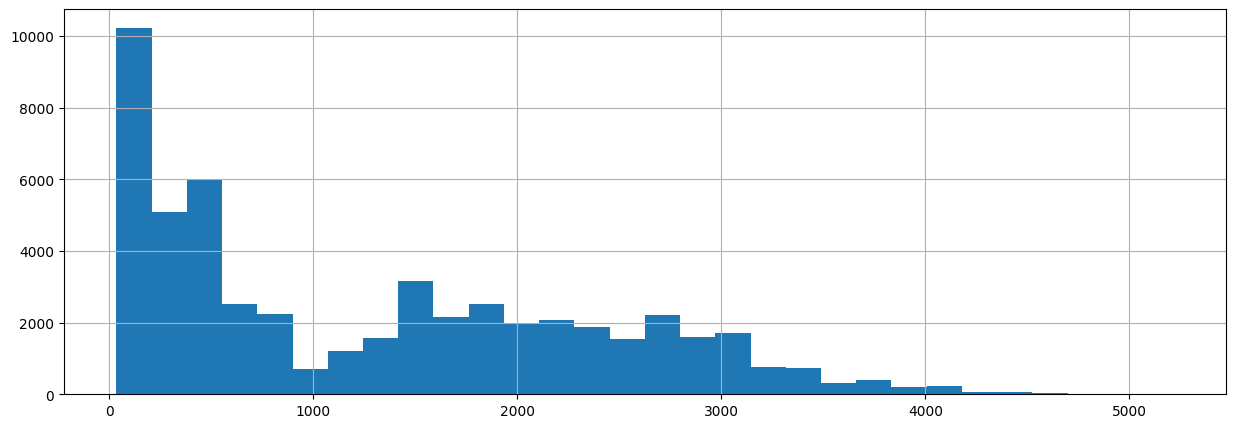

In [35]:
# Distribution of the number of days since first review
listings.time_since_first_review.hist(figsize=(15,5), bins=30);

In [36]:
# Takes in a column name, bin cut points and labels, replaces the original column with a binned version, 
# and replaces nulls (with 'unknown' if unspecified).

def bin_column(col, bins, labels, na_label='unknown'):
    listings[col] = pd.cut(listings[col], bins=bins, labels=labels, include_lowest=True)
    listings[col] = listings[col].astype('str')
    listings[col].fillna(na_label, inplace=True)

In [37]:
max_value = max(listings['time_since_first_review'].dropna())

# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 180, 365, 730, 1460, max_value],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

In [38]:
listings.last_review = pd.to_datetime(listings.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
listings['time_since_last_review'] = (datetime(2023, 10, 10) - listings.last_review).dt.days

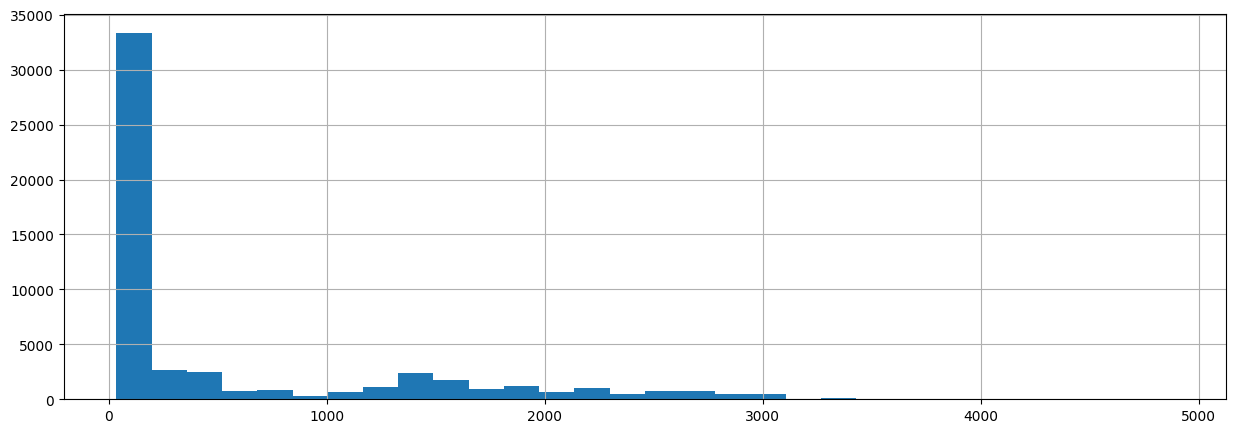

In [39]:
# Distribution of the number of days since last review
listings.time_since_last_review.hist(figsize=(15,5), bins=30);

In [40]:
max_value_last = max(listings['time_since_last_review'].dropna())


# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 180, 365, 730, 1460, max_value_last],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

In [41]:
# Dropping last_review - first_review will be kept for EDA and dropped later
listings.drop('last_review', axis=1, inplace=True)

### reviews

Will drop 'number_of_reviews_ltm' and 'reviews_per_month' as this is highly correlated with "number_of_reviews"

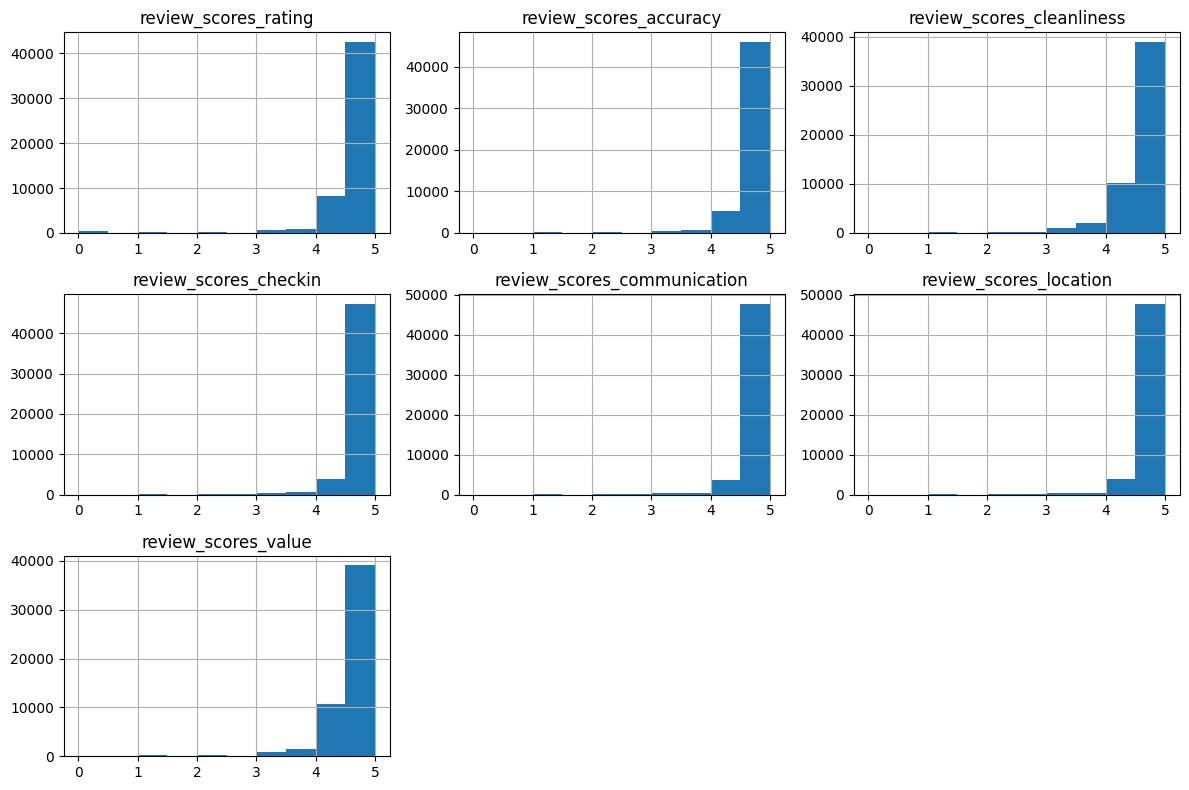

In [42]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(listings.columns[listings.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    listings[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [43]:
listings.drop(['number_of_reviews_ltm', 'number_of_reviews_l30d'], axis=1, inplace=True)


In [44]:
listings.head(10)

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,beds,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_days_active,air_conditioning,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,parking,host_greeting,internet,long_term_stays,pets_allowed,private_entrance,self_check_in,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
52931,2015-12-04,within an hour,90-99%,0.0,519.0,Batignolles-Monceau,48.89613,2.32746,Entire home/apt,4,2.0,209,3,730,1,20,17,2022-11-01,4.65,4.65,4.47,4.59,4.71,4.24,4.24,382,378,4,0,1.65,2867.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6-12 months,0-6 months
53353,2015-06-29,unknown,unknown,0.0,1.0,Buttes-Montmartre,48.88985,2.35066,Entire home/apt,6,3.0,297,2,120,1,83,37,2010-10-05,4.82,4.85,4.85,4.97,4.91,4.48,4.73,1,1,0,0,0.24,3025.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4+ years,0-6 months
3109,2008-10-14,within a day,100%,0.0,1.0,Observatoire,48.83191,2.31870,Entire home/apt,2,1.0,110,2,30,1,33,9,2016-12-27,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1,1,0,0,0.11,5474.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4+ years,2-3 years
54377,2010-09-28,within a few hours,100%,1.0,3.0,Buttes-Montmartre,48.88927,2.35903,Private room,3,1.0,120,3,30,1,30,102,2016-08-27,4.94,4.96,4.72,4.97,5.00,4.57,4.88,1,0,1,0,1.19,4760.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4+ years,0-6 months
5396,2009-02-14,within an hour,100%,0.0,1.0,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,2,1.0,140,1,1125,1,35,354,2009-06-30,4.56,4.60,4.54,4.79,4.83,4.95,4.55,1,1,0,0,2.05,5351.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4+ years,0-6 months
7397,2008-08-30,within a few hours,100%,1.0,1.0,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,4,2.0,140,10,130,1,9,337,2011-04-08,4.73,4.80,4.44,4.91,4.88,4.93,4.73,1,1,0,0,2.23,5519.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4+ years,0-6 months
55071,2010-10-12,within an hour,100%,0.0,1.0,Opéra,48.88047,2.34310,Entire home/apt,4,2.0,160,2,21,1,0,87,2011-06-05,4.81,4.86,4.62,4.90,4.87,4.84,4.68,1,1,0,0,0.58,4746.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4+ years,0-6 months
55239,2010-10-13,unknown,unknown,0.0,2.0,Élysée,48.87260,2.31477,Entire home/apt,4,1.0,982,1,21,1,73,20,2012-11-24,5.00,4.95,4.95,4.85,4.95,5.00,4.89,2,2,0,0,0.15,4745.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4+ years,1-2 years
7964,2009-06-18,within a day,50-89%,0.0,1.0,Opéra,48.87417,2.34245,Entire home/apt,2,1.0,180,7,365,1,5,6,2010-05-10,4.80,5.00,5.00,5.00,5.00,5.00,5.00,1,1,0,0,0.04,5227.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4+ years,4+ years


In [45]:
listings.to_excel('listings_modified.xlsx')